In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('sonar.all-data.csv')

In [3]:
df.head()

0.0200  0.0371  0.0428  0.0207  0.0954  0.0986  0.1539  0.1601  0.3109  \
0  0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1  0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2  0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3  0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4  0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   

   0.2111  ...  0.0027  0.0065  0.0159  0.0072  0.0167  0.0180  0.0084  \
0  0.2872  ...  0.0084  0.0089  0.0048  0.0094  0.0191  0.0140  0.0049   
1  0.6194  ...  0.0232  0.0166  0.0095  0.0180  0.0244  0.0316  0.0164   
2  0.1264  ...  0.0121  0.0036  0.0150  0.0085  0.0073  0.0050  0.0044   
3  0.4459  ...  0.0031  0.0054  0.0105  0.0110  0.0015  0.0072  0.0048   
4  0.3039  ...  0.0045  0.0014  0.0038  0.0013  0.0089  0.0057  0.0027   

   0.0090  0.0032  R  
0  0.0052  0.0044  R  
1  0.0095  0.0078  R  
2  0.0040  0.0117  R  
3  0.0107  0.0094  R  
4  0.0051  0.0062  R  

[5 rows x 61 columns]

<AxesSubplot:>

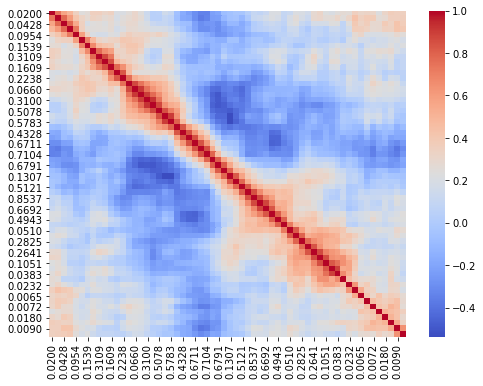

In [4]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),cmap='coolwarm')

In [100]:
df['Target'] = df['Label'].map({'R':0,'M':1})

In [101]:
np.abs(df.corr()['Target']).sort_values().tail(6)

Freq_45    0.339406
Freq_10    0.341142
Freq_49    0.351312
Freq_12    0.392245
Freq_11    0.432855
Target     1.000000
Name: Target, dtype: float64

In [103]:
from sklearn.model_selection import train_test_split 

In [104]:
X = df.drop(['Target','Label'],axis=1)
y = df['Label']

In [105]:
X_cv, X_test, y_cv, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [106]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [107]:
scaler = StandardScaler()

In [108]:
knn = KNeighborsClassifier()

In [109]:
operations = [('scaler',scaler),('knn',knn)]

In [110]:
from sklearn.pipeline import Pipeline

In [111]:
pipe = Pipeline(operations)

In [112]:
from sklearn.model_selection import GridSearchCV

In [79]:
k_values = list(range(1,30))

In [80]:
param_grid = {'knn__n_neighbors': k_values}

In [81]:
full_cv_classifier = GridSearchCV(pipe,param_grid,cv=5,scoring='accuracy')

In [82]:
full_cv_classifier.fit(X_cv,y_cv)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19,
                                              20, 21, 22, 23, 24, 25, 26, 27,
                                              28, 29]},
             scoring='accuracy')

In [83]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=1))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=1),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 1,
 'knn__p': 2,
 'knn__weights': 'uniform'}

In [114]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.84537696, 0.78065434, 0.77524893, 0.75917496, 0.75931721,
       0.74822191, 0.75945946, 0.71664296, 0.7113798 , 0.68421053,
       0.70042674, 0.68435277, 0.68449502, 0.67908962, 0.69530583,
       0.68990043, 0.7113798 , 0.70042674, 0.72204836, 0.67908962,
       0.70071124, 0.69530583, 0.69530583, 0.68463727, 0.68477952,
       0.67923186, 0.67411095, 0.65775249, 0.6685633 ])

Text(0, 0.5, 'Accuracy')

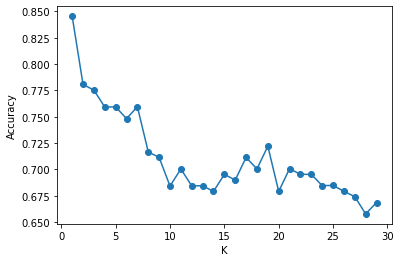

In [115]:
scores = full_cv_classifier.cv_results_['mean_test_score']
plt.plot(k_values,scores,'o-')
plt.xlabel("K")
plt.ylabel("Accuracy")

In [119]:
pred = full_cv_classifier.predict(X_test)

In [120]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [121]:
confusion_matrix(y_test,pred)

array([[12,  1],
       [ 1,  7]], dtype=int64)

In [122]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           M       0.92      0.92      0.92        13
           R       0.88      0.88      0.88         8

    accuracy                           0.90        21
   macro avg       0.90      0.90      0.90        21
weighted avg       0.90      0.90      0.90        21

